In [ ]:
## Data Analysis Summary Findings

# Northern Hemisphere city temperatures have a strong negative correlation to Northern Hemisphere city latitudes
# (as shown in the scatter plot).

# The cities that were farthest north from the equator were more likely to experience extreme cold as their max temp.

# There is close to no relation between Northern Hemisphere city's latitude and wind speed.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate city lists

# Create lists to hold lattitude/longitude data and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat/lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm there are at least 500
len(cities)

583

In [24]:
#Set Up using information from OpenWeatherAPI documentation to prepare for calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Create partial query URL to use for calls 
query_url = f"{url}appid={weather_key}&units={units}&q="

In [6]:
# #Test API on one city in list to see how the information is printed out
# test_response = requests.get(query_url + cities[0])
# test_json = test_response.json()

# #pretty print test_json to get a picture of the API output so you know what to call
# import pprint as pp

# pp.pprint(test_json)

{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': -17.3383, 'lon': -49.9314},
 'dt': 1611594493,
 'id': 3464363,
 'main': {'feels_like': 32.68,
          'grnd_level': 948,
          'humidity': 43,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 31.85,
          'temp_max': 31.85,
          'temp_min': 31.85},
 'name': 'Edéia',
 'sys': {'country': 'BR', 'sunrise': 1611565425, 'sunset': 1611612010},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 2.62}}


In [25]:
#Create empty lists to receive data
temp = []
humidity = []
cloudiness = []
wind_speed = []
cities_found = []
lat_cityfound = []
lng_cityfound = []
date = []
country = []

print("Beginning Data Retrieval")
print("-------------------------")
#Loop through the list of random cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()

    #If city found, add data to list
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        cities_found.append(city)
        lat_cityfound.append(response['coord']['lat'])
        lng_cityfound.append(response['coord']['lon'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        print(f"Processing {city}")
    except:
        print(f"{city} not found. Skipping...")
    


Beginning Data Retrieval
-------------------------
Processing hilo
Processing albany
Processing bredasdorp
Processing cockburn town
Processing atuona
Processing hermanus
Processing aklavik
Processing yar-sale
Processing victoria
Processing cape town
taolanaro not found. Skipping...
Processing new norfolk
Processing tupik
Processing pevek
Processing sioux lookout
Processing ponta do sol
Processing sayat
Processing samarai
Processing rikitea
Processing atchison
Processing port alfred
Processing norman wells
Processing antofagasta
Processing lebu
Processing severo-kurilsk
illoqqortoormiut not found. Skipping...
Processing lavrentiya
Processing vangaindrano
Processing bundibugyo
Processing yamada
Processing iwanai
Processing zhigansk
Processing ushuaia
Processing busselton
belushya guba not found. Skipping...
Processing carauari
Processing cabo san lucas
Processing yulara
Processing tuatapere
Processing ostrovnoy
Processing georgetown
Processing belaya gora
Processing luderitz
Processing g

Processing itarema
saleaula not found. Skipping...
Processing novoaleksandrovsk
taburao not found. Skipping...
Processing miyako
Processing tucuman
Processing licheng
Processing teya
Processing eureka
Processing seymchan
Processing arequipa
Processing gusau
Processing kulhudhuffushi
Processing rambha
Processing bacolod
Processing jiayuguan
Processing mitsamiouli
Processing temple
Processing kahului
Processing dakoro
yirol not found. Skipping...
Processing rosetta
Processing nantucket
Processing kununurra
Processing nikolayevsk-na-amure
Processing uusikaupunki
Processing malabo
Processing salalah
Processing balaka
Processing santa maria
Processing saldanha
Processing venado
Processing kashi
Processing hualmay
Processing provideniya
Processing north platte
Processing anadyr
Processing katangli
Processing laguna
Processing san patricio
Processing lasa
Processing umtata
Processing xichang
Processing brae
Processing tuy hoa
Processing ismailia
Processing vao
kazalinsk not found. Skipping...

In [26]:
#export city data into csv file

#create dataframe of city data
city_data_df = pd.DataFrame({"City": cities_found, "Lat": lat_cityfound, "Lng": lng_cityfound, "Max Temp": temp,
                            "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                            "Country": country, "Date": date})
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,73.40,83,90,6.26,US,1611782150
1,albany,42.6001,-73.9662,30.00,62,81,13.00,US,1611782082
2,bredasdorp,-34.5322,20.0403,57.20,72,96,5.75,ZA,1611782144
3,cockburn town,21.4612,-71.1419,80.60,54,40,10.36,TC,1611782640
4,atuona,-9.8000,-139.0333,78.48,78,2,15.17,PF,1611782151
...,...,...,...,...,...,...,...,...,...
528,salinopolis,-0.6136,-47.3561,80.29,82,88,7.96,BR,1611782188
529,nova olimpia,-14.7972,-57.2881,85.48,62,100,4.03,BR,1611782533
530,rawson,-43.3002,-65.1023,71.22,30,100,15.03,AR,1611782193
531,kiama,-34.6833,150.8667,70.00,77,100,1.99,AU,1611782721


In [27]:
#export city_data_df to csv

city_data_df.to_csv("cities.csv")

In [28]:
#get summary statistics data frame on Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Date

lat_summary = city_data_df["Lat"].describe()
lng_summary = city_data_df["Lng"].describe()
max_temp_summary = city_data_df["Max Temp"].describe()
humidity_summary = city_data_df["Humidity"].describe()
cloudiness_summary = city_data_df["Cloudiness"].describe()
wind_speed_summary = city_data_df["Wind Speed"].describe()
date_summary = city_data_df["Date"].describe()

summary_df = pd.DataFrame({"Lat":lat_summary,"Lng":lng_summary,"Max Temp": max_temp_summary,
                          "Humidity":humidity_summary,"Cloudiness":cloudiness_summary,
                           "Wind Speed":wind_speed_summary,"Date":date_summary})

summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,20.355201,19.266302,47.858180,73.958724,55.913696,8.440525,1.611782e+09
std,33.845754,93.282949,33.833415,19.235144,39.567493,5.894835,2.528521e+02
min,-54.800000,-175.200000,-48.890000,9.000000,0.000000,0.360000,1.611782e+09
25%,-7.259700,-65.222600,27.550000,66.000000,17.000000,3.830000,1.611782e+09
50%,23.295500,25.570100,59.000000,79.000000,75.000000,7.360000,1.611783e+09
75%,49.849600,102.265500,75.200000,88.000000,94.000000,11.500000,1.611783e+09
max,78.218600,179.316700,93.110000,100.000000,100.000000,34.520000,1.611783e+09


In [29]:
#Inspect data and skip cities with humidity > 100 
big_humid_indx = city_data_df.index[city_data_df["Humidity"]<=100]
big_humid_indx

#if no city has humidity > 100, skip this step
#create new data frame
#clean_city_df = city_data_df.drop(big_humid)

Int64Index([], dtype='int64')

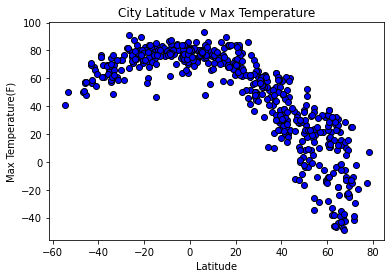

In [30]:
#Create Scatter Plot of Temp vs Latitude
plt.scatter(lat_cityfound, temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/LatTemp.png")
plt.show()

In [ ]:
##City Lat v Max Temp Scatter Analysis
#The above chart is analyzing each city's max tempterature based on where they are located in relation to
#the equator.

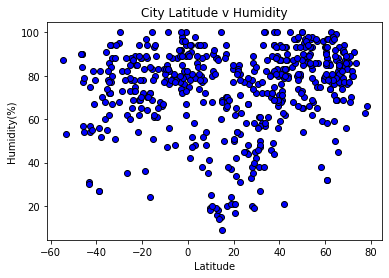

In [31]:
#Create Scatter Plot of Humidity vs Latitude
plt.scatter(lat_cityfound, humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("Images/LatHumidity.png")
plt.show()

In [ ]:
## City Lat v Humidity Scatter Plot Analysis
# The above chart is looking at each city's humidity (or the amount of water vapor in the air) in
# comparison to how far the city is from the equator

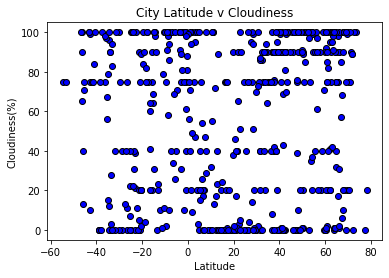

In [32]:
#Create Scatter Plot of Cloudiness vs Latitude
plt.scatter(lat_cityfound, cloudiness, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("Images/LatClouds.png")
plt.show()

In [ ]:
## City Lat v Cloudiness Scatter Plot Analysis
# The above chart is looking at how cloudy each city is in comparison to how far the city is from the equator

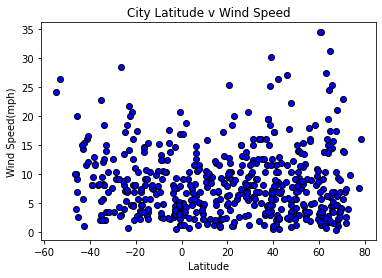

In [33]:
#Create Scatter Plot of Wind Speed vs Latitude
plt.scatter(lat_cityfound, wind_speed, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig("Images/LatWind.png")
plt.show()

In [ ]:
## City Lat v Wind Speed Scatter Plot Analysis
# The above chart is looking at the wind speed in each city in comparison to 
# the location of the city from the equator

In [34]:
#Separate plots into Northern Hemisphere and Southern Hemisphere

north_df = city_data_df.loc[city_data_df["Lat"]>=0]
south_df = city_data_df.loc[city_data_df["Lat"]<=0]

north_lat = north_df["Lat"]
south_lat = south_df["Lat"]

The r-value is: -0.8647342751941164


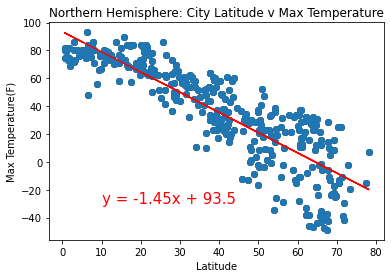

In [35]:
#Northern Hemisphere Scatter Plot of Temp vs Latitude

#Create list of north max temps
north_temp = north_df["Max Temp"]

#create scatter plot
plt.scatter(north_lat, north_temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/NorthLatTemp.png")
plt.show()

In [ ]:
# There is a strong, negative correlation between a Northern Hemisphere city's latitude and max temperature.
# This seems to predict that as a city gets closer to the equator, the warmer it becomes. 

The r-value is: 0.6355887144609655


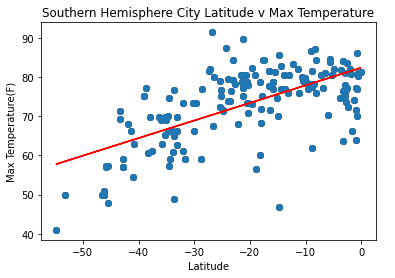

In [36]:
#Southern Hemisphere Scatter Plot of Temp vs Latitude
#Create list of north max temps
south_temp = south_df["Max Temp"]

#create scatter plot
plt.scatter(south_lat, south_temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/SouthLatTemp.png")
plt.show()

In [ ]:
# There is a positive correlation between a Sourthern Hemisphere city's latitude and its max temperature.
# Although it isn't as strong as the relationship between a Norhtern Hemisphere city's lat/temp, it can
# be used to predict a city's temperature based on where it is located in relation to the equator.

The r-value is: 0.3436311458664904


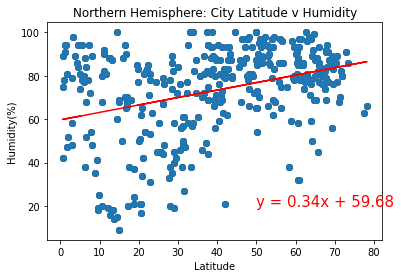

In [37]:
#Northern Hemisphere Scatter Plot of Humidity vs Latitude

#Create list of north max temps
north_humidity = north_df["Humidity"]

#create scatter plot
plt.scatter(north_lat, north_humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/NorthLatHumidity.png")
plt.show()

In [ ]:
# There doesn't seem to be much of a relation between a city's latitude and humidity in the northern hemisphere
# as shown by the r-value closer to 0 than 1 or -1.

The r-value is: 0.2813368471966035


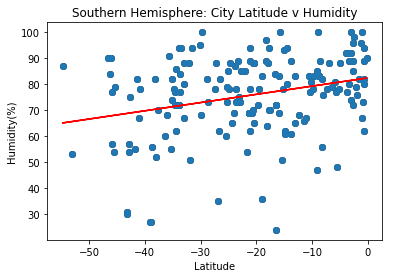

In [38]:
#Southern Hemisphere Scatter Plot of Humidity vs Latitude

#Create list of north max temps
south_humidity = south_df["Humidity"]

#create scatter plot
plt.scatter(south_lat, south_humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/SouthLatHumidity.png")
plt.show()

In [ ]:
# There seems to be even less of a relation between a city's latitude and humidity in the southern hemisphere
# as shown by the r-value closer to 0 than 1 or -1.

The r-value is: 0.29024758352694235


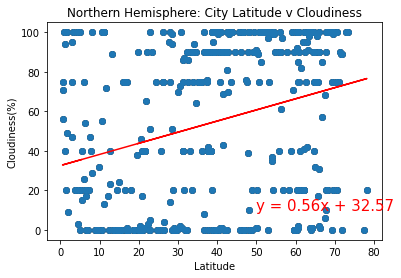

In [39]:
#Northern Hemisphere Scatter Plot of Cloudiness vs Latitude

#Create list of north max temps
north_clouds = north_df["Cloudiness"]

#create scatter plot
plt.scatter(north_lat, north_clouds, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/NorthLatCloud.png")
plt.show()

In [ ]:
# The linear regression above also shows a weak correlation between city latitude and cloudiness, with
# city location really seeming to have nothing to do with cloudiness.
# It would be interesting to see if the closer a city is to an ocean, if there are more clouds there.

The r-value is: 0.15001467440444052


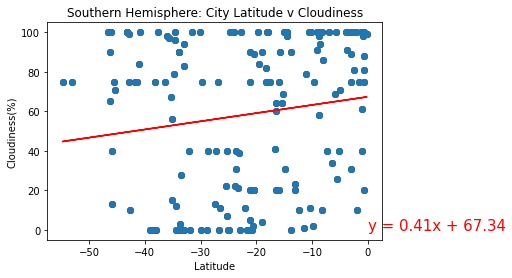

In [40]:
#Southern Hemisphere Scatter Plot of Cloudiness vs Latitude

#Create list of north max temps
south_clouds = south_df["Cloudiness"]

#create scatter plot
plt.scatter(south_lat, south_clouds, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/SouthLatCloud.png")
plt.show()

In [ ]:
# Theere is a weak correlation between city latitude and cloudiness, with city location really seeming to have nothing to do with cloudiness.
# As with the chart above, itt would be interesting to see if the closer a city is to an ocean, if there are more clouds there.

The r-value is: 0.04931791979155296


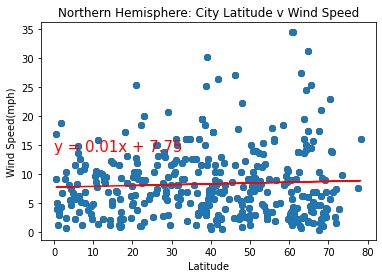

In [41]:
#Northern Hemisphere Scatter Plot of Wind Speed vs Latitude

#Create list of north max temps
north_wind = north_df["Wind Speed"]

#create scatter plot
plt.scatter(north_lat, north_wind, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/NorthLatWind.png")
plt.show()

In [ ]:
# There is even less of a correlation between a northern hemisphere city's lattitude and its wind speed with a nearly horizontal regression line.

The r-value is: -0.25573908974407783


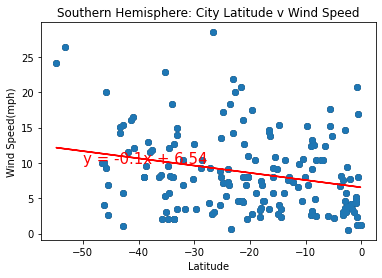

In [42]:
#Southern Hemisphere Scatter Plot of Wind Speed vs Latitude

#Create list of north max temps
south_wind = south_df["Wind Speed"]

#create scatter plot
plt.scatter(south_lat, south_wind, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/SouthLatWind.png")
plt.show()

In [ ]:
# There is a weak negative correlation between a Southern Hemisphere city's latitude and wind speed.